# Insurance fraud

## Data collection
The data I have gathered is from Kaggle. I have looked at multiple options for my project. The other options did not seem to have any reliability since the data was randomly generated and did not have any patterns. The dataset I am using now has more potential the dataset shows patterns and other people have used this dataset to make a prediction.

### Origin
The origin of the dataset comes from a website called Databricks. Databricks does not give any further information about the origin of the dataset.

The data does show trustworthiness since it is not randomly generated but actually shows patterns. The data has reliability since it has patterns that I can make predictions on.

https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data

In [1]:
import sklearn
import pandas
import seaborn

print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pandas.__version__)            # 1.5.1
print("seaborn version:", seaborn.__version__)  

scikit-learn version: 1.1.3
pandas version: 1.5.1
seaborn version: 0.12.1


In [2]:
pandas.set_option('display.max_rows',None)
df = pandas.read_excel("./insurance_claims.xlsx")


## Data cleaning
In this part of the notebook I am going to clean the data. I will have a first look at the data and clean it from any irregularities.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   x                            1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

with df.info() I get an quick overview of the data and see the type of each column

In [4]:
df.isna().sum()

x                                 0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot: >

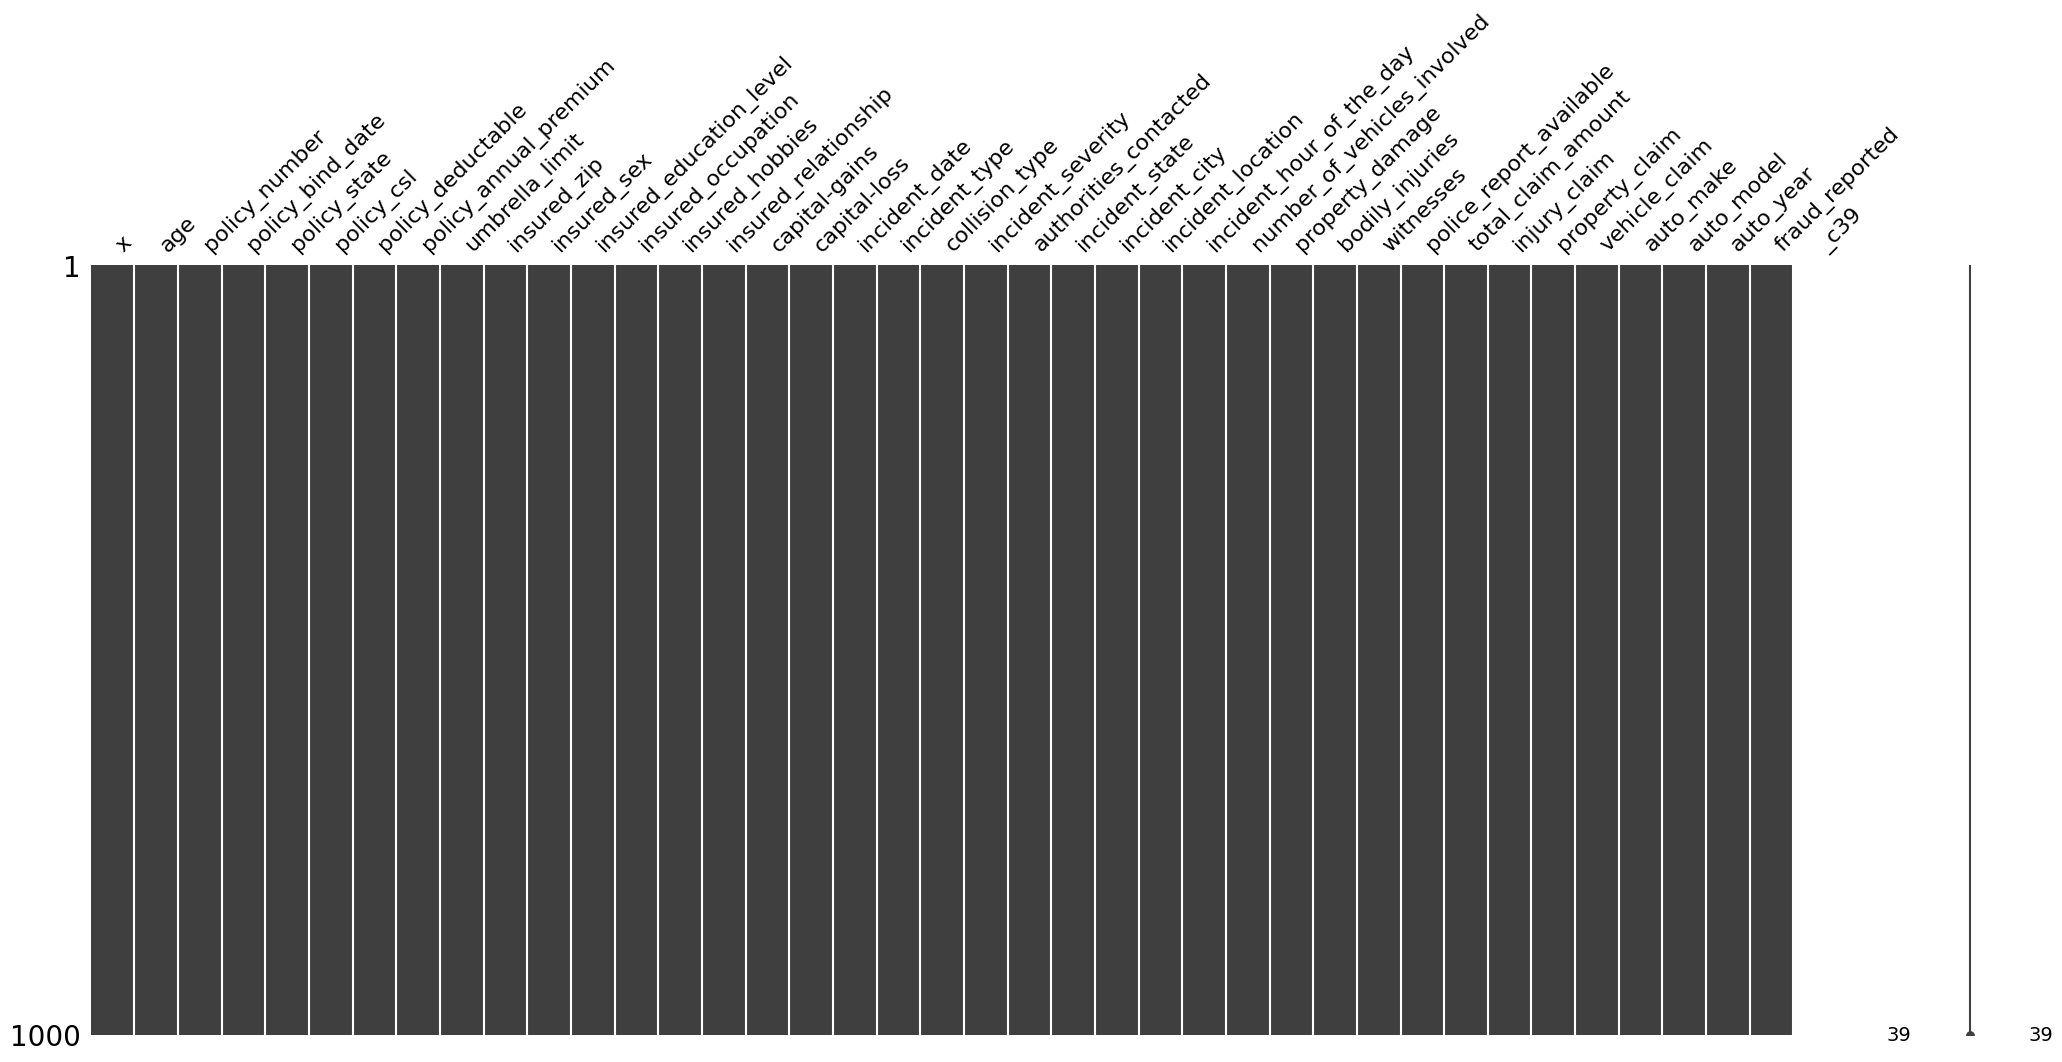

In [5]:
import missingno as msno

msno.matrix(df)


since _c39 is an empty column I am going to remove this column from the dataset since there is no record with a value

In [6]:
df = df.drop('_c39', axis=1)

In [7]:
df.head(10)

,x,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


I want the data to be accurate, so to make it more accurate, I need to find and remove outliers. I do this using a histogram. With a histogram you can see the distribution of the data and can eaily find outliers

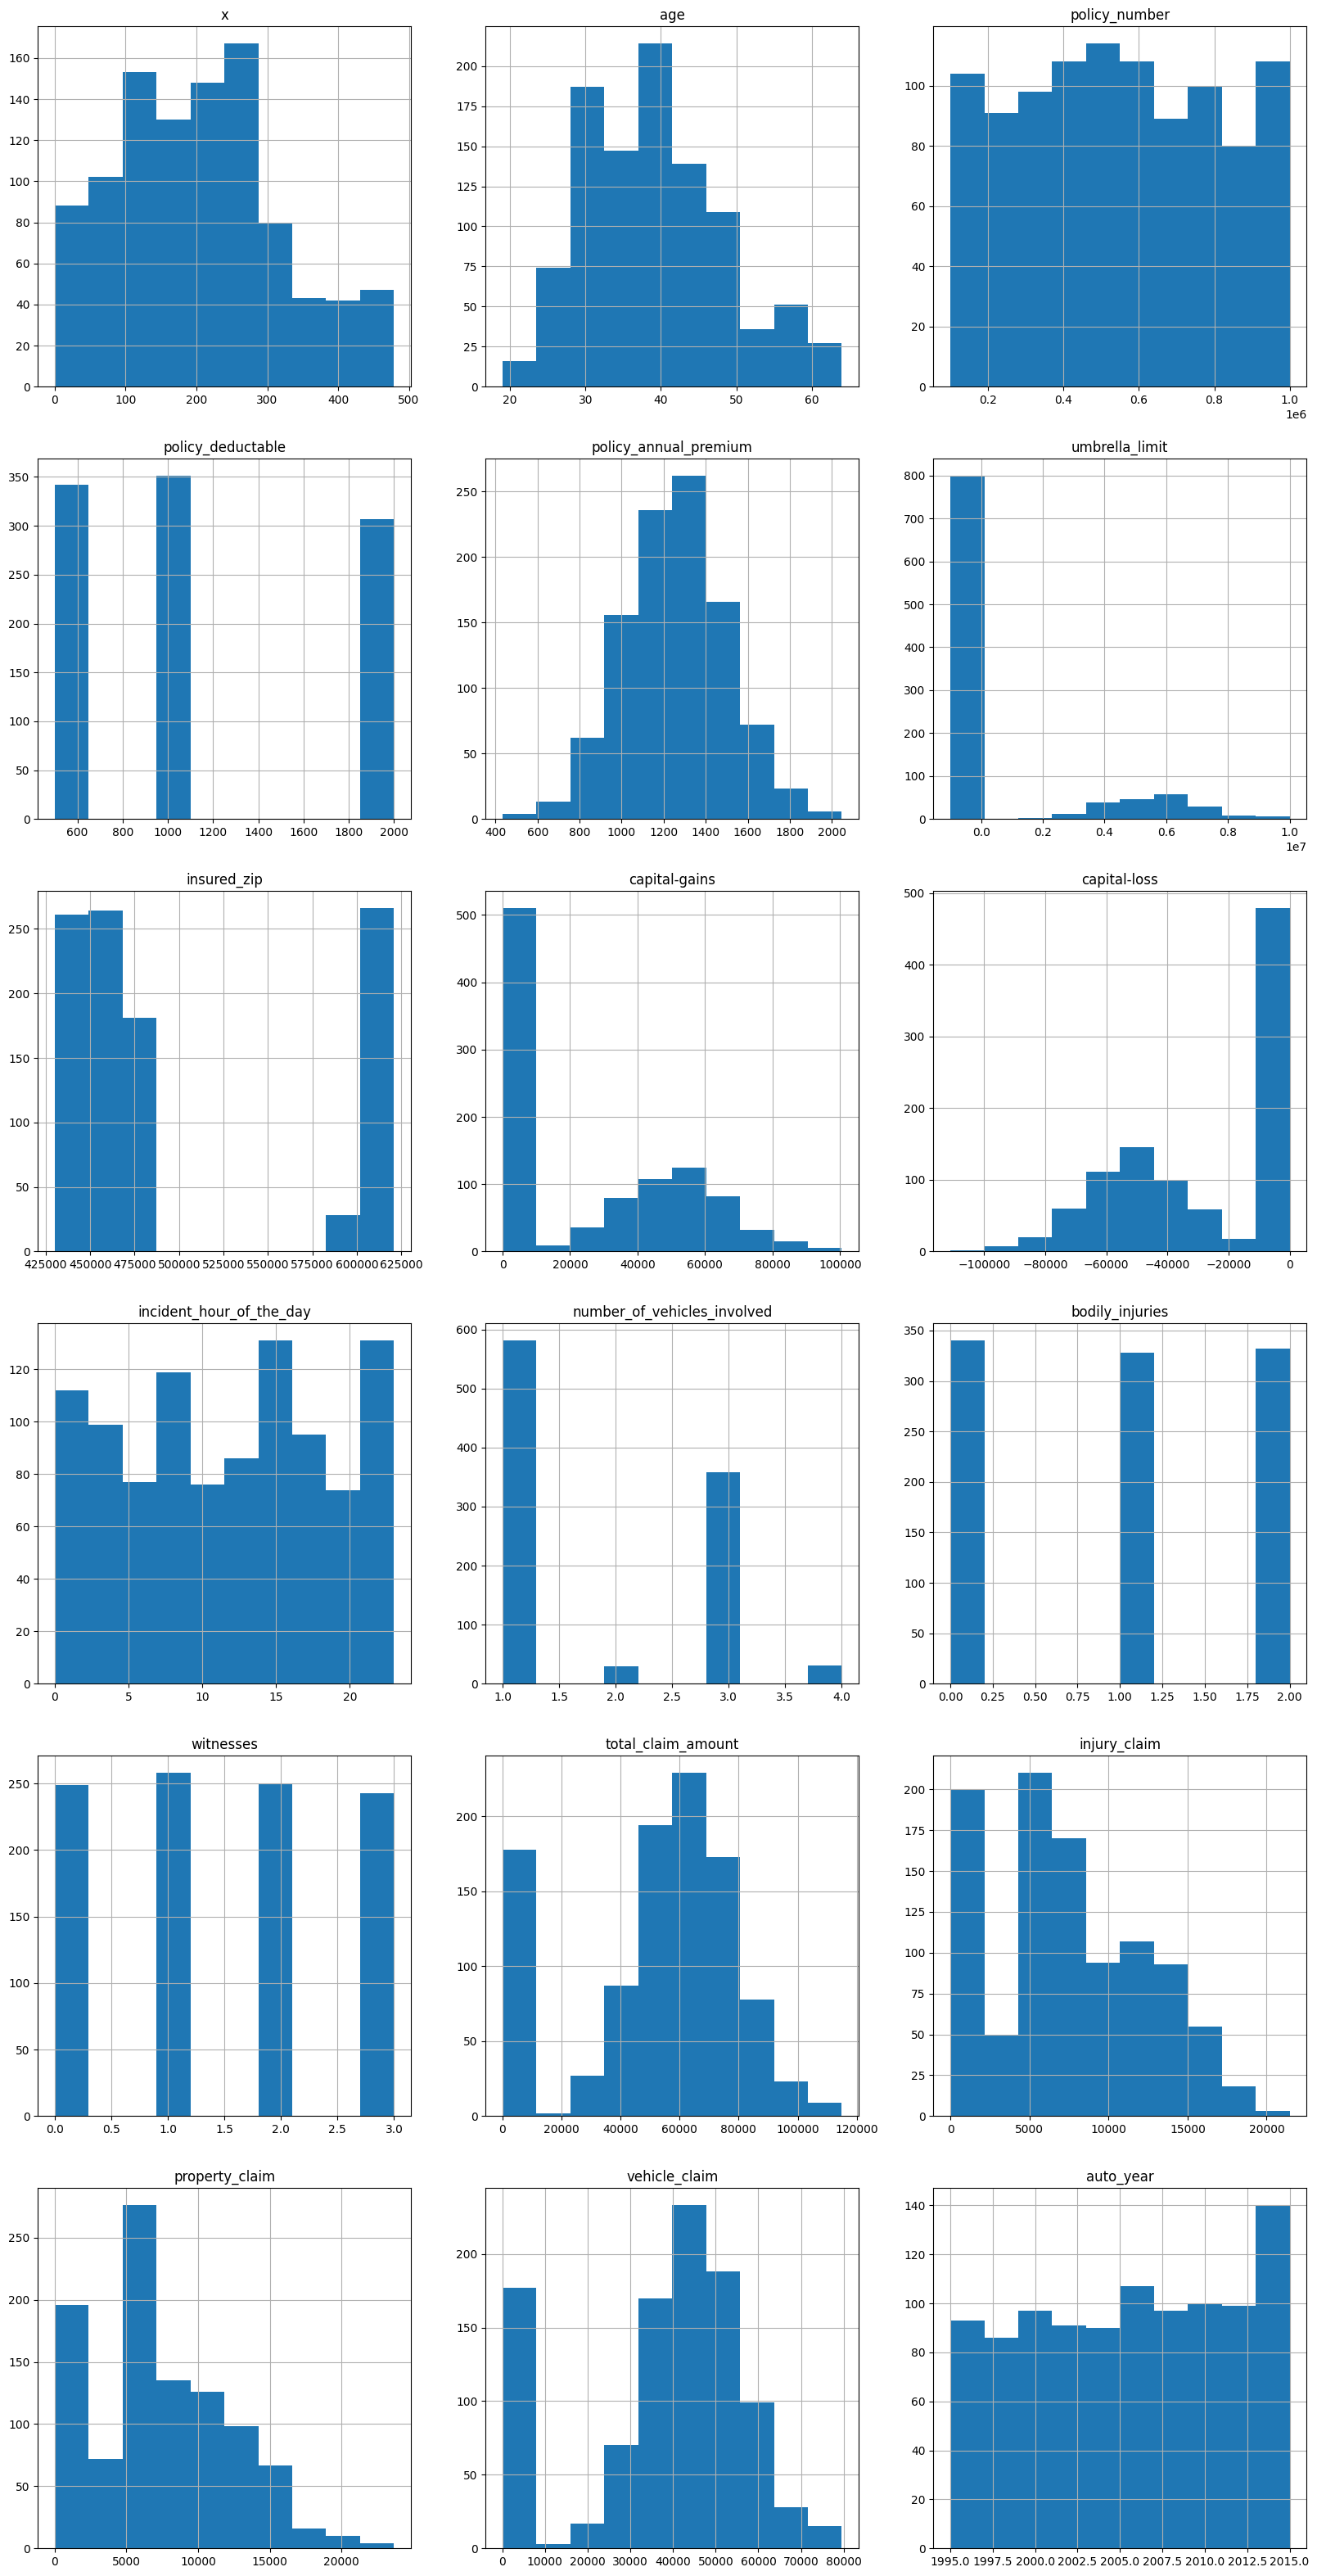

In [8]:
import matplotlib.pyplot as plt
import math

object_columns = list(df.select_dtypes(include=['int64','float64']).columns)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,40))

for i,col in enumerate(object_columns):
    hist = df[col].hist(ax = axes[math.floor(i / 3),i % 3])
    hist.set(title=col)

There is a lot going on in these diagrams but at first glance it does not seem like there are any irregularities. But some diagrams do seem to have some peaks. 
<li><strong>X:</strong>Has a high correlation with age but for now does not have any importance</li>
<li><strong>Age:</strong>The age group is pretty well distributed for all the age groups a bit less older people</li>
<li><strong>Policy number:</strong> Is the ID of the policy holder and does not have any patterns</li>
<li><strong>Policy decuctable:</strong> Contains 3 pekas and shows that this is divided into 3 groups</li>
<li><strong>Policy annual premium:</strong> The data is nicely distributed and is the amount payed per month by an policy holder</li>
<li><strong>Umbrella limit:</strong> This is an extra option for your insurance so not every policy holder has this enabled</li>
<li><strong>Zipcode:</strong> The dataset only contains a few regions of america</li>
<li><strong>Nmber of vehicles involved:</strong> I do not have a explanation why 2 and 4 is so low and 3 is high but my main theory is that people that hit another car cause a chain reation</li>
<li><strong>Bodily injuries:</strong> Some peaks but this is because you can not have 1,5 person same goes for <strong>witnesses</strong></li>
<li><strong>All the claim amount:</strong> Seem to have an higher peak at 0 at this point I do not have an explanation for this.</li>

In [9]:
originalLenght = len(df.index)
df.drop_duplicates()
print(originalLenght - len(df.index), "Duplicate Rows have been removed")

0 Duplicate Rows have been removed


# Data requirements
In this section I am going to look at data and understand wat the values mean and influence they could have. I am going to talk about the data and what the data measn

### Progress and items to include
This dataset is pretty clean already so checking for empty columns is not necessary. The dataset does need to contain some values, when speaking to the stakeholder there were a few point he mentioned that could be useful when checking for fraud.
<li>Prices of the claim</li>
<li>User id</li>
<li>Time date of incident</li>
<li>Insured interest</li>
<li>Risk factor</li>
<li>How long is some one member</li>
<li>Amount that is claimed and how often has the person been in a accident</li>

These are values that are useful when looking into fraud the dataset needs to have at least almost all of these to make a correct prediction


### Stake holder and domain
The stakeholder is now working as an accountant for a firm. He works a lot with numbers and know what to look out for and how to do analysis in datasets. He knew a lot of people that commit fraud and what to look for in datasets and finding people that have committed fraud.

### attitude and interesting topics
What I expect is that people who commit fraud make a high claim that people that do not commit fraud. the people that have multiple requested should have an higher interest for this model and how long people are registered as an insurance holder.

### Data candidates
This dataset can be used later to maybe merge the data. The contains a lot of similar columns that could be useful when expanding the dataset. 


https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

The data dictionary gives an overview of the data in the dataset and gives an description of what the columns mean. Knowing what the data means can help understanding the data and helps with finding coalition between the data.

<table>
    <thead>
        <tr>
            <th>Columns Name</th>
            <th>Description</th>
            <th>Data Type</th>
            <th>Example</th>
            <th>Category</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td>X</td>
            <td>Has a coalition with age but I cannot find the meaning</td>
            <td>Int64</td>
            <td>155</td>
            <td>Fact</td>
        </tr>   
        <td>Age</td>
            <td>The age of the policy holder</td>
            <td>Int64</td>
            <td>35</td>
            <td>Fact</td>
        </tr>  
        <tr>
            <td>Policy Number</td>
            <td>Is an Id that refers to the Policy holder</td>
            <td>Int64</td>
            <td>336614</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Policy Bind Date</td>
            <td>The start date of the policy</td>
            <td>Datetime</td>
            <td>1-8-2003</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Policy state</td>
            <td>The state where the policy holder lives</td>
            <td>Object</td>
            <td>IL</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Policy CSL</td>
            <td>The price the insurance company will pay when the policy holder is at fault</td>
            <td>Int64</td>
            <td>500/100</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Policy Deductible</td>
            <td>Refers to the amount of money that an insured individual or company is responsible for paying before their insurance coverage kicks in.</td>
            <td>Int64</td>
            <td>1000</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Policy Annual Premium</td>
            <td>Annual premium refers to the amount of money that an insured individual or company pays to an insurance company</td>
            <td>Int64</td>
            <td>1088</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Umbrella Limit</td>
            <td>Umbrella limit refers to the maximum amount of coverage available under an umbrella insurance policy. It is a type of insurance that provides additional liability coverage above and beyond the limits of a person's existing home, auto, or other insurance policies.</td>
            <td>Int64</td>
            <td>0</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Insured Zip</td>
            <td>Policy holders zip code</td>
            <td>int64</td>
            <td>614780</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Insured Sex</td>
            <td>The gender of the policy holder</td>
            <td>int64</td>
            <td>FEMALE</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>insured education</td>
            <td>The education level of the policy holder</td>
            <td>Object</td>
            <td>Associate</td>
            <td>Dimension</td>
        </tr>        
        <tr>
            <td>insured occupation</td>
            <td>The occupation level of the policy holder</td>
            <td>Object</td>
            <td>adm-clerical</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>insured hobbies</td>
            <td>The hobbies of the policy holder</td>
            <td>Object</td>
            <td>yachting</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>insured relationship</td>
            <td>The relation ship status of the policy holder</td>
            <td>Object</td>
            <td>other-relative</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Capital Gains</td>
            <td></td>
            <td>Int64</td>
            <td>81100</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Capital Loss</td>
            <td></td>
            <td>Int64</td>
            <td>0</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Incident date</td>
            <td>Date of the incident</td>
            <td>Date Time</td>
            <td>24-2-2015</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Incident Type</td>
            <td>Type of incident</td>
            <td>Date Time</td>
            <td>Multi-vehicle</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Incident severity</td>
            <td>Refers tot the amount of damage that is caused in a accident to the car</td>
            <td>Object</td>
            <td>Front collision</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Authorities contacted</td>
            <td>What authorities have been contacted</td>
            <td>Object</td>
            <td>Police</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Incident state</td>
            <td>The state of the incident found place</td>
            <td>Object</td>
            <td>NY</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Incident city</td>
            <td>The city of the incident</td>
            <td>Object</td>
            <td>Arlington</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Incident location</td>
            <td>The street name of the incident</td>
            <td>Object</td>
            <td>6092 5th AVE</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Incident hour of day</td>
            <td>Time incident took place</td>
            <td>Int32</td>
            <td>16</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Number of vehicles involved</td>
            <td>The amount of vehicles involved in the accident</td>
            <td>Int32</td>
            <td>3</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Property damage</td>
            <td>If there is any property damage</td>
            <td>Object</td>
            <td>YES</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Bodily injuries</td>
            <td>How many people got injuries</td>
            <td>int32</td>
            <td>2</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Witnesses</td>
            <td>How many people have seen the accident</td>
            <td>int32</td>
            <td>3</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Police report available</td>
            <td>If there is an police report available</td>
            <td>Object</td>
            <td>YES</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Total claim amount</td>
            <td>The total amount of money that an insurance company pays out to a policyholder for a claim related to a covered incident involving their vehicle</td>
            <td>Int32</td>
            <td>29790</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Injury claim</td>
            <td>Refers to a claim made by a policyholder for injuries they sustained in an accident that is covered by their insurance policy</td>
            <td>Int64</td>
            <td>3310</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Property Claim</td>
            <td>Amount of damage that has been done to some ones property</td>
            <td>Int64</td>
            <td>3310</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Vehicle Claim</td>
            <td>The claim that has been made for the vehicles in the accident</td>
            <td>Int64</td>
            <td>23170</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Auto make</td>
            <td>Brand of the auto model</td>
            <td>Object</td>
            <td>BMW</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Auto model</td>
            <td>The model name of the car</td>
            <td>Object</td>
            <td>3 Series</td>
            <td>Dimension</td>
        </tr>
        <tr>
            <td>Auto year</td>
            <td>The year of the car</td>
            <td>Int32</td>
            <td>2008</td>
            <td>Fact</td>
        </tr>
        <tr>
            <td>Fraud reported</td>
            <td>If there is any fraud reported</td>
            <td>Object</td>
            <td>No</td>
            <td>Fact</td>
        </tr>
    </tbody>
</table>



### How to find the facts
There is a lot of data in the dataset that could be useful. So the claims that have been made are interesting because people who commit fraud want more money so the claim would be higher but not too high to be noticed. It is also interesting to see the cases with the higher witnesses since it would be harder to commit fraud if more people have seen it happen. The number of vehicles involved is also interesting since the higher the more difficult it is to commit fraud.

# Data visualisation
I am going to make a visualization to get a better understanding what the data means. I am also going to look  at the coalition between data and look at which data could be useful.

C:\Users\vickl\AppData\Local\Temp\ipykernel_25088\376227470.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


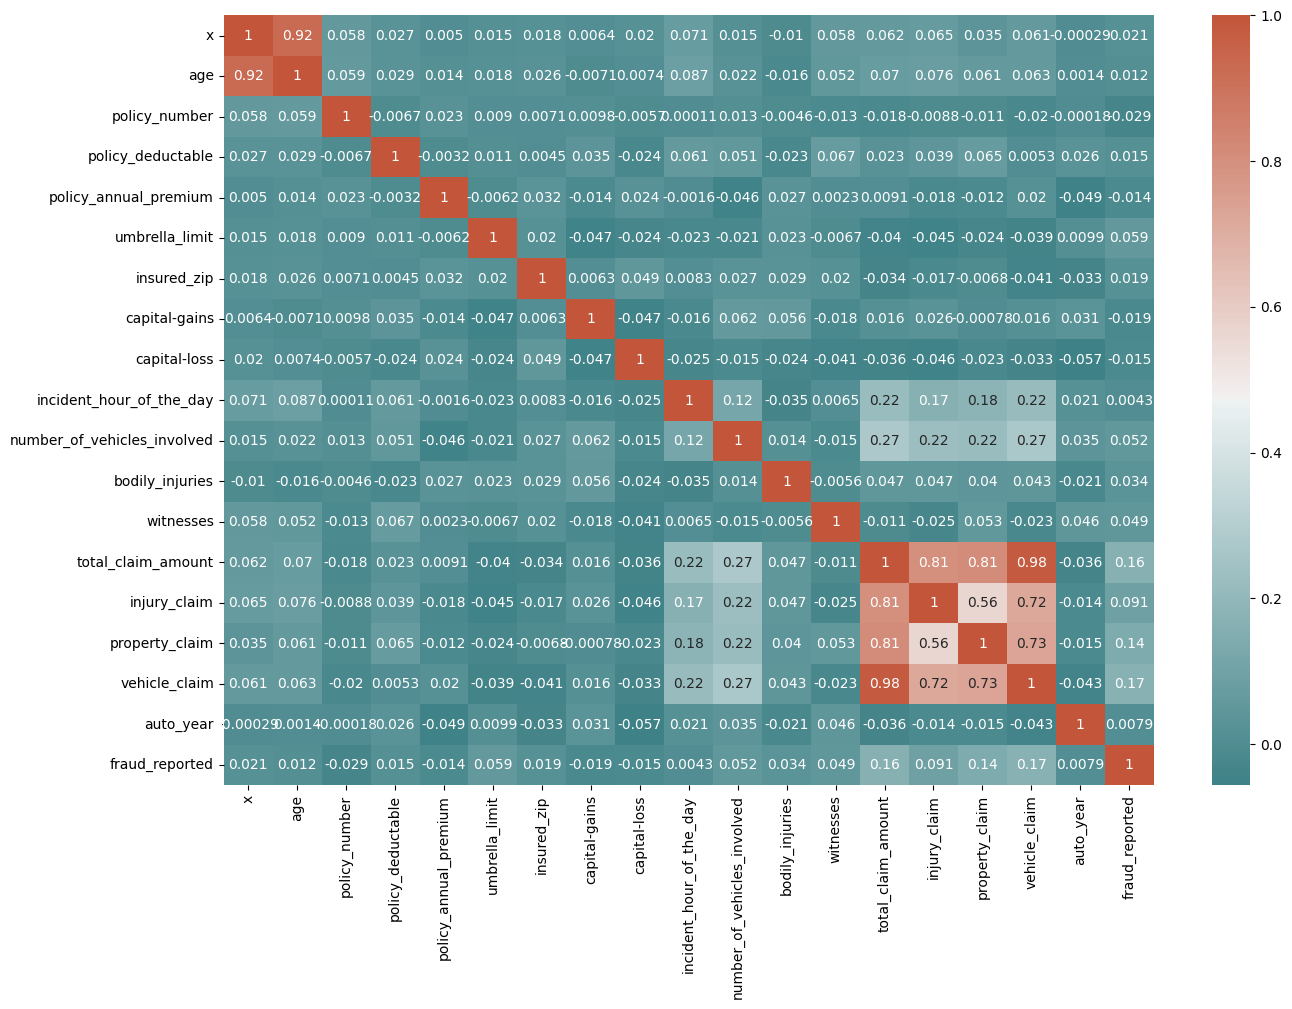

In [10]:
df['fraud_reported'] = df['fraud_reported'].replace({'Y':1,'N':0})
# changing fraud reported to int so that it can be used in a heatmap
corr = df.corr()
plt.subplots(figsize=(15,10))
seaborn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=seaborn.diverging_palette(200, 20, as_cmap=True))
plt.show()

The heatmap doesn’t show direct a lot of coalition between fraud reported and the other data points. The claim amount seem to have some coalition and I curious to see have this could impact the fraud reported. 



To get a quick understanding I will make an quick overview of the people that do and do not commit fraud. In this overview you can see the average and the count for every column.

In [11]:
df[df['fraud_reported'] == 1].describe()

,x,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.0
mean,208.080972,39.141700,533030.206478,1151.821862,1250.236275,1.336032e+06,503637.959514,24193.522267,-27522.672065,11.696356,1.931174,1.040486,1.582996,60302.105263,8208.340081,8560.121457,43533.643725,2005.186235,1.0
std,119.824064,9.648295,256334.029066,628.123674,253.263651,2.494799e+06,70487.502045,27766.252081,27603.232184,6.888256,1.047315,0.830308,1.066962,20746.279567,4550.307780,4631.741098,14849.388907,6.071871,0.0
min,3.000000,19.000000,104594.000000,500.000000,484.670000,0.000000e+00,430141.000000,0.000000,-91200.000000,0.000000,1.000000,0.000000,0.000000,2860.000000,0.000000,0.000000,2080.000000,1995.000000,1.0
25%,116.000000,32.000000,332231.000000,500.000000,1062.615000,0.000000e+00,452924.500000,0.000000,-51650.000000,6.000000,1.000000,0.000000,1.000000,51910.000000,5370.000000,5815.000000,37170.000000,2000.000000,1.0
50%,199.000000,38.000000,516959.000000,1000.000000,1269.640000,0.000000e+00,469853.000000,0.000000,-30200.000000,12.000000,1.000000,1.000000,2.000000,61290.000000,7240.000000,7440.000000,44800.000000,2006.000000,1.0
75%,279.000000,45.000000,736652.500000,2000.000000,1396.330000,0.000000e+00,603807.000000,48850.000000,0.000000,17.000000,3.000000,2.000000,2.000000,72665.000000,11900.000000,11300.000000,52080.000000,2011.000000,1.0
max,478.000000,63.000000,999435.000000,2000.000000,1935.850000,1.000000e+07,620819.000000,91900.000000,0.000000,23.000000,4.000000,2.000000,3.000000,112320.000000,20700.000000,21810.000000,77760.000000,2015.000000,1.0


In [12]:
df[df['fraud_reported'] == 0].describe()

,x,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,753.000000,753.000000,753.000000,753.000000,753.00000,7.530000e+02,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.0
mean,202.600266,38.884462,550571.297477,1130.810093,1258.43000,1.023904e+06,500419.537849,25432.005312,-26554.581673,11.626826,1.808765,0.976096,1.455511,50288.605578,7179.229748,7018.884462,36090.491368,2005.075697,0.0
std,113.574565,8.973139,257323.903505,606.771634,241.24721,2.225209e+06,72123.981953,27918.464555,28280.492080,6.976417,1.008252,0.816689,1.124415,27575.191379,4961.204029,4828.915463,19698.046058,6.001184,0.0
min,0.000000,20.000000,100804.000000,500.000000,433.33000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,0.0
25%,115.000000,32.000000,342830.000000,500.000000,1097.64000,0.000000e+00,446606.000000,0.000000,-51400.000000,6.000000,1.000000,0.000000,0.000000,34650.000000,3480.000000,3720.000000,25200.000000,2000.000000,0.0
50%,200.000000,38.000000,543610.000000,1000.000000,1253.12000,0.000000e+00,465674.000000,0.000000,-20400.000000,12.000000,1.000000,1.000000,1.000000,56520.000000,6620.000000,6560.000000,41220.000000,2005.000000,0.0
75%,276.000000,44.000000,771509.000000,2000.000000,1422.56000,0.000000e+00,603195.000000,51400.000000,0.000000,17.000000,3.000000,2.000000,2.000000,69480.000000,11120.000000,10600.000000,49980.000000,2010.000000,0.0
max,479.000000,64.000000,998865.000000,2000.000000,2047.59000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,0.0


When looking at the average of the columns there doesn’t seem to be any pattern in the numbers. Some of the columns do have some difference that could be interesting later.
<li><strong>Umbrella limit:</strong> The people that commit fraud seem to have an higher umbrella limit with around 25% this could be to get an extra claim amount and make more money on the request</li>
<li><strong>Total claim amount:</strong> The total claim amount seems to be higher by 20% for the people that commit fraud this seems logical since the idea is to make as much money as possible. </li>



I have looked at the numerical data and have found some useful variables. Now I want to take a look at the Categorical data and look at some categories that stand out from the rest. To make this visualization I am going to make a few count plot that shows that amount of people that commit fraud for each group of each category.

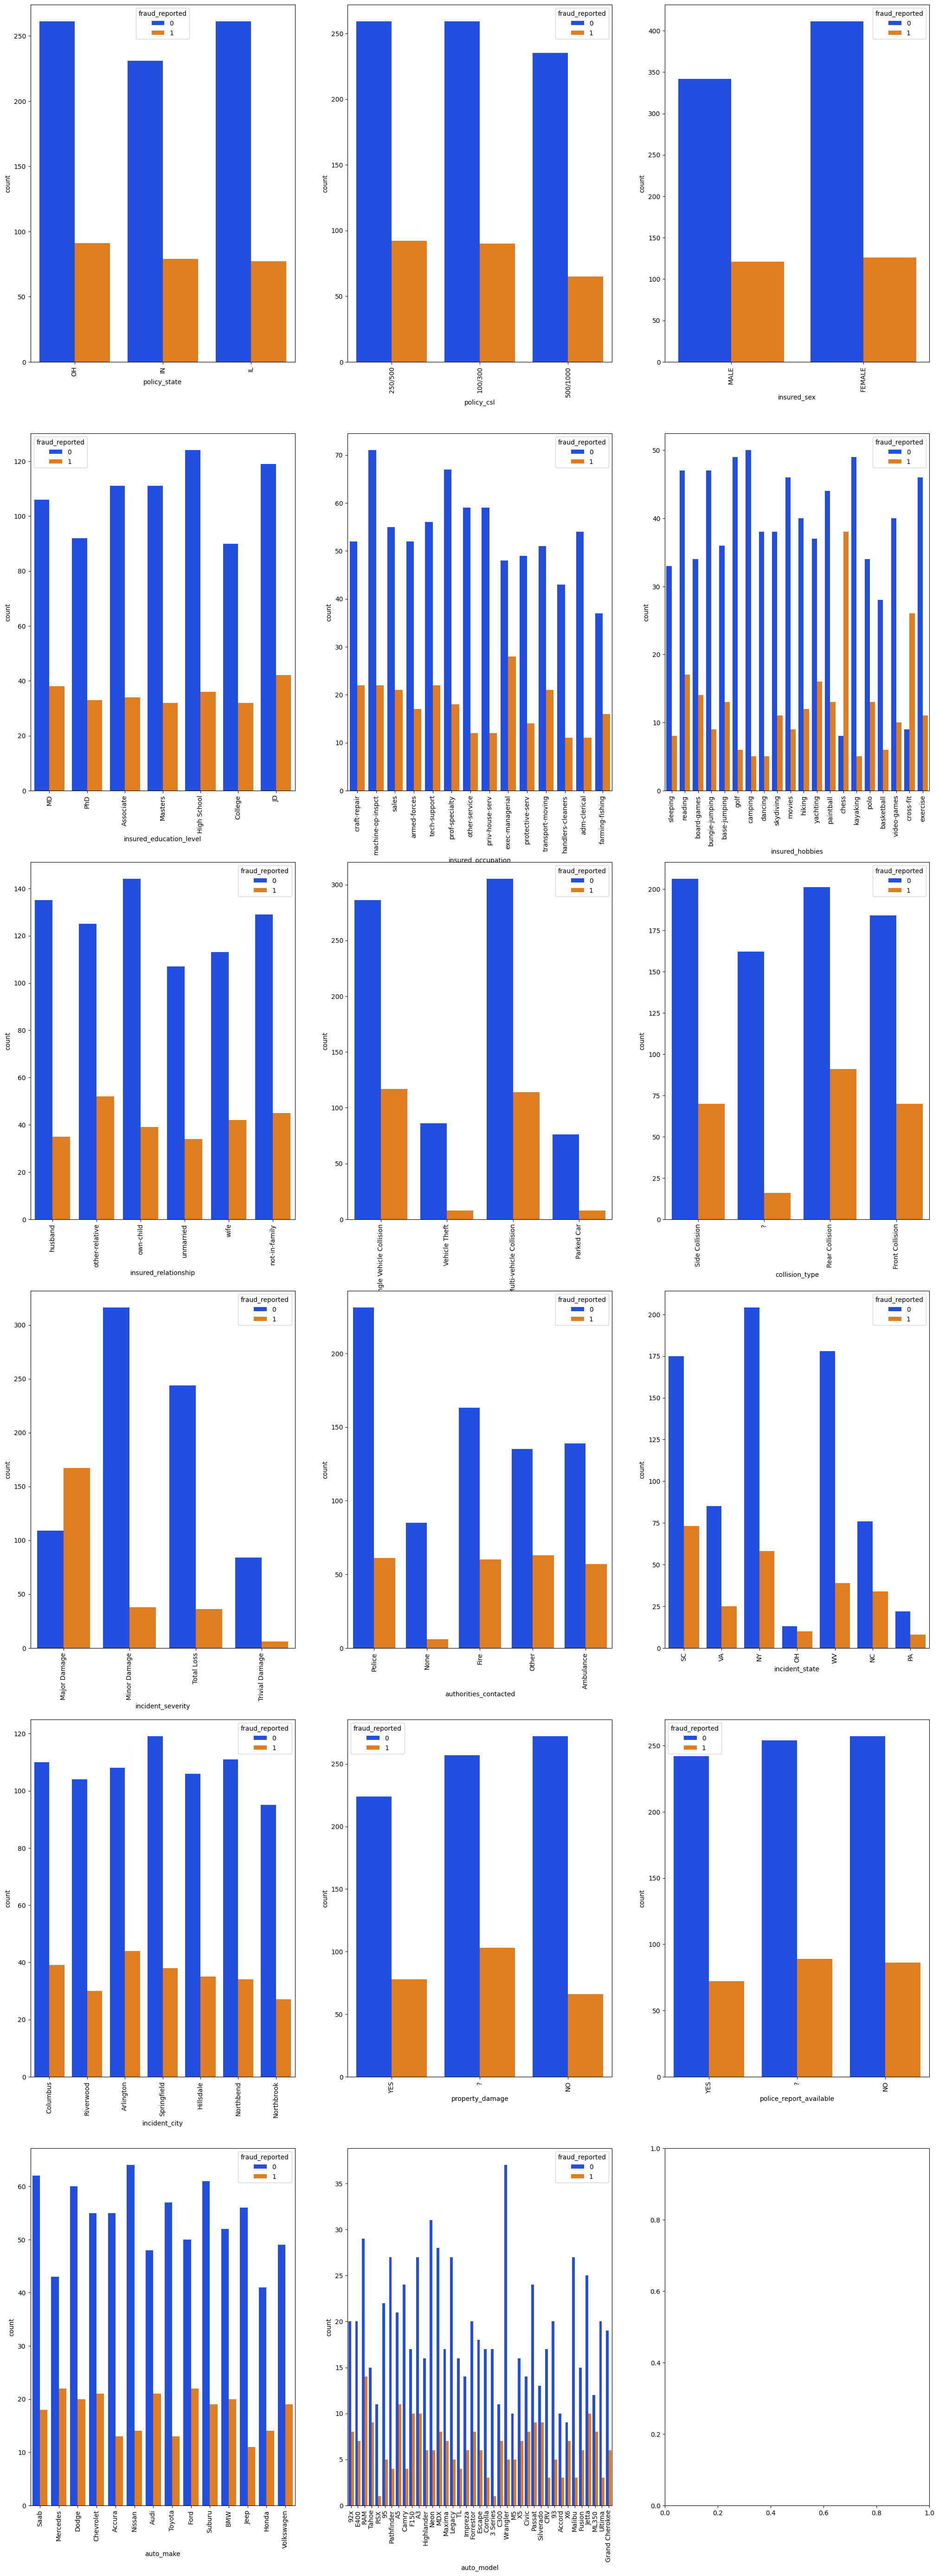

In [13]:
import math
object_columns = list(df.select_dtypes(include=['object']).columns)
object_columns.remove('incident_location') # removed because there are to many unique street names
fig, axes = plt.subplots(6, 3, figsize=(25, 70))

for id,col in enumerate(object_columns):
    chart = seaborn.countplot(ax=axes[math.floor(id/3), id%3],data=df, x =col,hue='fraud_reported',palette='bright' )
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Since the auto model is a bit hard to read I am going to make it a easier to read. Instead of counting the fraud per auto model I am going to calculate the percentage of fraud per model. To visualize this I am going to use a bar plot.

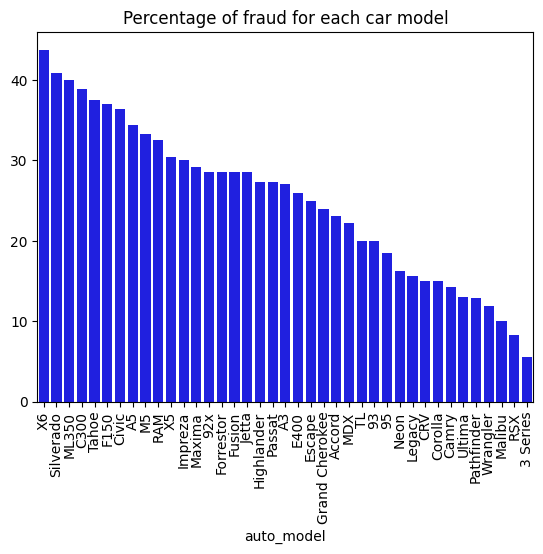

In [14]:
import numpy as np

model_fraud =  df.groupby('auto_model')['fraud_reported'].mean() * 100
model_fraud = model_fraud.sort_values(ascending=False)
seaborn.barplot(df, x= model_fraud.index,y=model_fraud.values,color='blue')
plt.xticks(rotation=90)
plt.title('Percentage of fraud for each car model')
plt.show()



Interesting enough the 3 series and x6 are both from BMW and have the highest and lowest chance of fraud. Using the auto make can lead to inaccurate predictions int the model can still be used. To see what makes these types so different I am going to make an overview of the numerical values and see if there are any differences.


In [15]:
df[df['auto_model'] == '3 Series'].describe()

,x,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,167.222222,36.333333,514959.777778,1111.111111,1245.365556,1.333333e+06,497777.888889,27077.777778,-18761.111111,11.611111,1.500000,0.833333,1.166667,52523.333333,8013.888889,6718.888889,37790.555556,2006.000000,0.055556
std,91.092426,6.145299,198699.029372,607.684989,229.812119,2.656845e+06,71781.818486,30129.788964,25863.195264,5.521497,0.857493,0.857493,1.098127,30527.051649,5810.761962,4608.938743,21714.868442,6.173949,0.235702
min,9.000000,26.000000,171254.000000,500.000000,900.020000,0.000000e+00,438877.000000,0.000000,-70100.000000,2.000000,1.000000,0.000000,0.000000,2520.000000,280.000000,280.000000,1960.000000,1995.000000,0.000000
25%,95.750000,31.250000,387098.000000,500.000000,1076.282500,0.000000e+00,450878.250000,0.000000,-38100.000000,7.250000,1.000000,0.000000,0.000000,30542.500000,3287.500000,3287.500000,23937.500000,2002.500000,0.000000
50%,160.000000,35.500000,510118.500000,1000.000000,1217.925000,0.000000e+00,460425.500000,12500.000000,0.000000,12.000000,1.000000,1.000000,1.000000,64745.000000,7110.000000,6795.000000,44345.000000,2007.000000,0.000000
75%,251.750000,41.500000,620964.750000,1750.000000,1413.747500,0.000000e+00,571514.750000,55900.000000,0.000000,16.000000,1.750000,1.750000,2.000000,76795.000000,13130.000000,8950.000000,53080.000000,2010.750000,0.000000
max,299.000000,46.000000,976908.000000,2000.000000,1624.820000,8.000000e+06,614780.000000,81100.000000,0.000000,20.000000,3.000000,2.000000,3.000000,90400.000000,17360.000000,15580.000000,72320.000000,2015.000000,1.000000


In [16]:
df[df['auto_model'] == 'X6'].describe()

,x,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,16.000000,16.000000,16.00000,16.000000,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.00000,16.000000
mean,209.875000,40.312500,549317.25000,968.750000,1248.215625,2.250000e+06,501258.312500,13743.750000,-22812.500000,11.250000,2.437500,1.250000,1.250000,66480.62500,10245.625000,9841.250000,46393.750000,2002.93750,0.437500
std,122.268489,8.971947,224490.92281,561.805126,286.943615,3.109126e+06,76284.273102,21743.350516,25655.925242,6.737952,1.030776,0.856349,1.183216,17557.56455,4593.239915,3936.153579,12114.410634,6.27661,0.512348
min,32.000000,29.000000,175177.00000,500.000000,625.080000,0.000000e+00,433250.000000,0.000000,-62400.000000,0.000000,1.000000,0.000000,0.000000,33930.00000,0.000000,3770.000000,28620.000000,1995.00000,0.000000
25%,98.500000,36.500000,417273.50000,500.000000,1043.010000,0.000000e+00,441020.000000,0.000000,-49250.000000,7.500000,1.000000,0.750000,0.000000,56105.00000,7807.500000,6917.500000,39332.500000,1997.75000,0.000000
50%,212.500000,39.000000,510775.00000,1000.000000,1341.765000,0.000000e+00,469997.000000,0.000000,-7850.000000,13.000000,3.000000,1.500000,1.000000,65605.00000,10040.000000,10040.000000,45480.000000,2002.50000,0.000000
75%,260.750000,41.500000,736240.25000,1000.000000,1400.380000,5.250000e+06,602757.750000,33050.000000,0.000000,15.500000,3.000000,2.000000,2.000000,78792.50000,13295.000000,12415.000000,56565.000000,2007.00000,1.000000
max,478.000000,64.000000,979336.00000,2000.000000,1694.090000,8.000000e+06,620197.000000,59600.000000,0.000000,21.000000,4.000000,2.000000,3.000000,91520.00000,17400.000000,16640.000000,66560.000000,2014.00000,1.000000


Some observations that are interesting:
1. <strong>Insured hobbies</strong>: chess and cross fit have has more people committing fraud then people not committing fraud
2. <strong>Authorities contacted</strong>: People who are committing fraud rarely not call the authorities
3. <strong>Incident severity</strong>: The accident with major damage have more change of being a fraud and the ones with trivial damage have the least chance of being fraud.
4. <strong>Collision type</strong>: When the collision type is not known the changes of being fraud are smaller.
5. <strong>Incident type</strong>: Vehicle theft and parked car are the ones where the least amount of fraud is committed this could be because people don’t commit fraud with these crimes or these crimes are hard to proof of fraud.
6. <strong>Auto model</strong>: There is a big difference between car models the first one is 5% and the last one is around 45% my and both of these are from the some brand what surprises me.

In the interview we had to have a change to talk about what factor we should look at when checking for data. One way is to check how many times a persons has had an accident and how long this person is a customer the longer the better.


In [17]:
df[df['policy_number'].duplicated()].head(10)

,x,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


Looking at the policy number there are no multiple rows in this dataset so we cannot look if a singular person would have made multiple request and if this increases the change of fraud. I have also looked at the row x and the policy bind date but these also don's show any way to identify a person.





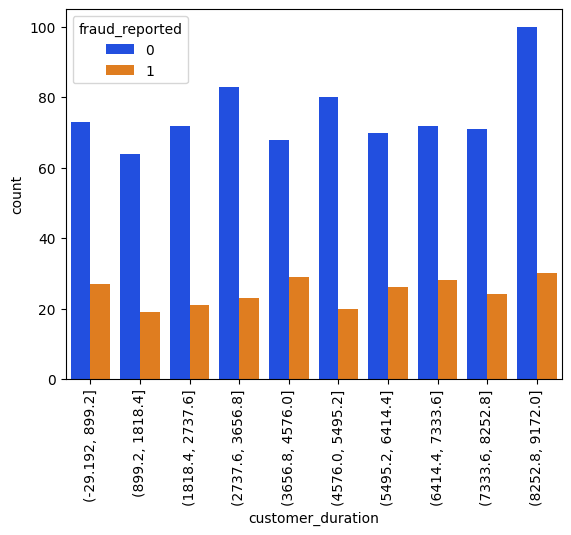

In [18]:
df['customer_duration'] = (df['incident_date'] - df['policy_bind_date']).dt.days
bins = pandas.cut(df['customer_duration'],10)
chart = seaborn.countplot(x=bins,hue=df['fraud_reported'],palette='bright' )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

The time people have been a customer also don’t have much effect on the chance they are going to commit fraud.



The things I want to look at some more are to put people in groups when looking at the histograms there are a few groups you can put people in for example the umbrella limit is an extra coverage for house and property insurance my hypothesis would be that people with extra insurance have more to lose when committing fraud.



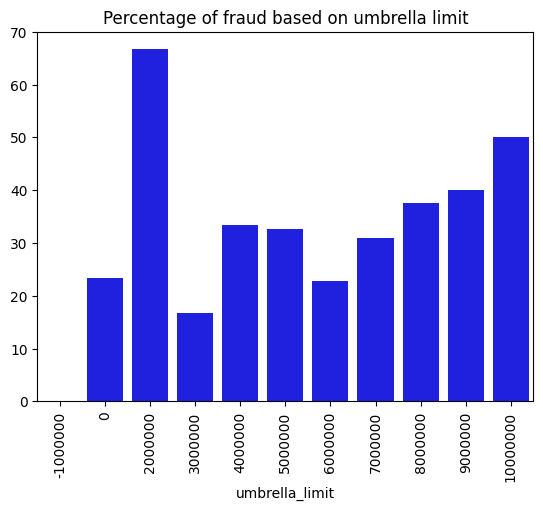

In [19]:
umbrella_fraud =  df.groupby('umbrella_limit')['fraud_reported'].mean() * 100

seaborn.barplot(df, x= umbrella_fraud.index,y=umbrella_fraud.values,color='blue')
plt.xticks(rotation=90)
plt.title('Percentage of fraud based on umbrella limit')
plt.show()


With an umbrella limit you basically have an extra insurance that covers not only the car but also you house for example, My hypothesis is that people that commit fraud choose for the extra umbrella limit and to get a higher claim amount on the insurance request.



In [20]:
df[df['umbrella_limit'] > 0].describe()

,x,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,customer_duration
count,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,204.800995,38.930348,545488.482587,1134.328358,1256.053532,5.482587e+06,502207.472637,22649.751244,-27666.666667,11.407960,1.781095,1.074627,1.462687,50888.109453,7024.477612,7236.169154,36627.462687,2005.179104,0.298507,4431.009950
std,119.628426,9.458601,241692.351453,621.985266,226.413437,1.486925e+06,73096.358118,26647.928858,28223.533325,7.059231,1.005903,0.830303,1.117967,26761.152898,4720.932837,4786.776029,19137.323847,6.126807,0.458746,2561.183808
min,2.000000,20.000000,100804.000000,500.000000,566.110000,2.000000e+06,430632.000000,0.000000,-91200.000000,0.000000,1.000000,0.000000,0.000000,2640.000000,0.000000,0.000000,1760.000000,1995.000000,0.000000,106.000000
25%,107.000000,31.000000,368050.000000,500.000000,1123.870000,4.000000e+06,446788.000000,0.000000,-52100.000000,5.000000,1.000000,0.000000,0.000000,40500.000000,4280.000000,4420.000000,27200.000000,2000.000000,0.000000,2010.000000
50%,204.000000,38.000000,531640.000000,1000.000000,1257.830000,6.000000e+06,467762.000000,0.000000,-30300.000000,12.000000,1.000000,1.000000,1.000000,56070.000000,6280.000000,6750.000000,40590.000000,2005.000000,0.000000,4473.000000
75%,281.000000,44.000000,719989.000000,2000.000000,1399.270000,6.000000e+06,603827.000000,46800.000000,0.000000,17.000000,3.000000,2.000000,2.000000,68200.000000,10620.000000,10480.000000,49560.000000,2010.000000,1.000000,6549.000000
max,465.000000,63.000000,992145.000000,2000.000000,1935.850000,1.000000e+07,620819.000000,82100.000000,0.000000,23.000000,4.000000,2.000000,3.000000,103560.000000,16860.000000,21630.000000,77670.000000,2015.000000,1.000000,9097.000000


In [21]:
df[df['umbrella_limit'] == 0].describe()

,x,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,customer_duration
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.0,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,203.640351,38.948622,546452.912281,1137.218045,1256.392043,0.0,501043.368421,25781.328321,-26607.393484,11.701754,1.854637,0.972431,1.493734,53182.042607,7535.012531,7428.546366,38218.483709,2005.095238,0.234336,4813.655388
std,114.061386,9.069569,261094.383798,609.651179,248.707371,0.0,71400.835596,28156.513891,28089.256964,6.931373,1.022420,0.816543,1.110839,26282.693882,4920.867729,4827.194025,18801.802366,5.986472,0.423849,2713.445461
min,0.000000,19.000000,101421.000000,500.000000,433.330000,0.0,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,0.000000,-20.000000
25%,119.000000,32.000000,328820.000000,500.000000,1082.547500,0.0,448821.000000,0.000000,-51475.000000,6.000000,1.000000,0.000000,1.000000,42500.000000,4347.500000,4495.000000,30490.000000,2000.000000,0.000000,2547.750000
50%,198.500000,38.000000,536799.000000,1000.000000,1256.620000,0.0,466339.500000,10500.000000,-21850.000000,12.000000,1.000000,1.000000,1.000000,58500.000000,6880.000000,6745.000000,42595.000000,2005.000000,0.000000,4812.000000
75%,275.750000,45.000000,774747.000000,2000.000000,1422.322500,0.0,603131.750000,51500.000000,0.000000,17.000000,3.000000,2.000000,2.000000,71025.000000,11410.000000,10930.000000,51120.000000,2010.000000,0.000000,7239.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,0.0,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000,9172.000000


The data does not seem to have any big irregularities the only thing I can see is that people that have an umbrella limit have a 21,5% higher fraud percentage.

# Processing
I am going to process the data look at what data we need for the model in this section we are going to set a target variable to predict. I am going to prepare the data for the model. 

First I am going to remove all the columns that do not have influence on the model such as time, date and age. Instead of dropping the table I am keeping some because there are so many.

I want to remove the data that us not useable by the model. In the data understanding I looked at which features could be useful in the model and I Made the conclusion insured_hobbies, incident_type, collision_type, incident_severity, auto_model, authorities_contacted are the best features with the most coalition with fraud_reported.


In [22]:
encoded_df = df[['fraud_reported','insured_hobbies','incident_type','collision_type','incident_severity','auto_model','authorities_contacted']]
encoded_df.head(10)

,fraud_reported,insured_hobbies,incident_type,collision_type,incident_severity,auto_model,authorities_contacted
0,1,sleeping,Single Vehicle Collision,Side Collision,Major Damage,92x,Police
1,1,reading,Vehicle Theft,?,Minor Damage,E400,Police
2,0,board-games,Multi-vehicle Collision,Rear Collision,Minor Damage,RAM,Police
3,1,board-games,Single Vehicle Collision,Front Collision,Major Damage,Tahoe,Police
4,0,board-games,Vehicle Theft,?,Minor Damage,RSX,None
5,1,bungie-jumping,Multi-vehicle Collision,Rear Collision,Major Damage,95,Fire
6,0,board-games,Multi-vehicle Collision,Front Collision,Minor Damage,Pathfinder,Police
7,0,base-jumping,Multi-vehicle Collision,Front Collision,Total Loss,A5,Police
8,0,golf,Single Vehicle Collision,Front Collision,Total Loss,Camry,Police
9,0,camping,Single Vehicle Collision,Rear Collision,Total Loss,92x,Other


Machine learning models aren’t that good at handling object classes so to make it easier I am going to make different column from all the variables in the columns.



In [23]:
dummies = pandas.get_dummies(encoded_df[['insured_hobbies','incident_type','collision_type','incident_severity','auto_model','authorities_contacted']])

# Add the new columns to the original DataFrame
encoded_df = pandas.concat([encoded_df, dummies], axis=1)
encoded_df.head(10)

,fraud_reported,insured_hobbies,incident_type,collision_type,incident_severity,auto_model,authorities_contacted,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,...,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,1,sleeping,Single Vehicle Collision,Side Collision,Major Damage,92x,Police,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,reading,Vehicle Theft,?,Minor Damage,E400,Police,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,board-games,Multi-vehicle Collision,Rear Collision,Minor Damage,RAM,Police,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,board-games,Single Vehicle Collision,Front Collision,Major Damage,Tahoe,Police,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,board-games,Vehicle Theft,?,Minor Damage,RSX,None,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,1,bungie-jumping,Multi-vehicle Collision,Rear Collision,Major Damage,95,Fire,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,board-games,Multi-vehicle Collision,Front Collision,Minor Damage,Pathfinder,Police,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,0,base-jumping,Multi-vehicle Collision,Front Collision,Total Loss,A5,Police,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,golf,Single Vehicle Collision,Front Collision,Total Loss,Camry,Police,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,camping,Single Vehicle Collision,Rear Collision,Total Loss,92x,Other,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
X = encoded_df.drop(['fraud_reported','insured_hobbies','incident_type','collision_type','incident_severity','auto_model','authorities_contacted'],axis=1)
y = encoded_df['fraud_reported']
X.columns

Index(['insured_hobbies_base-jumping', 'insured_hobbies_basketball',
       'insured_hobbies_board-games', 'insured_hobbies_bungie-jumping',
       'insured_hobbies_camping', 'insured_hobbies_chess',
       'insured_hobbies_cross-fit', 'insured_hobbies_dancing',
       'insured_hobbies_exercise', 'insured_hobbies_golf',
       'insured_hobbies_hiking', 'insured_hobbies_kayaking',
       'insured_hobbies_movies', 'insured_hobbies_paintball',
       'insured_hobbies_polo', 'insured_hobbies_reading',
       'insured_hobbies_skydiving', 'insured_hobbies_sleeping',
       'insured_hobbies_video-games', 'insured_hobbies_yachting',
       'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft',
       'collision_type_?', 'collision_type_Front Collision',
       'collision_type_Rear Collision', 'collision_type_Side Collision',
       'incident_severity_Major Damage', 'incident_severity_Minor Damage',
  

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 1000 observations, of which 800 are now in the train set, and 200 in the test set.


# Modelling
Using sklearn algorithm cheat-sheet I am going to look at which models would work best and why. I am going to look further for even more models that could be useful. When an acceptable accuracy is reached I am going to try and improve the model and look at the hyper parameters and find the best option.



## chossing the right algorithm

I want to check which algorithm would work best for my data to visualize this I am going to make a graph at the end with all the results. Classification seems like the way to go since I am trying to predict a label.

In [26]:
Classification_Rapports = []
algorithmScores = []

<img src="ml_map.png"
     alt="Choosing the right estimator"
     style="float: left; max-width:800px" />

I am using labeled data and have more around 1k records for this reason I am going to use sgd classifier if this doesn’t work I want to use the kernel approximation. I also want to look at nearest neighbors and svc. since there are 2 categories I want to look at clustering for this I want to use  Kmeans although I don't think clustering is the right algorithm for this data.



## sgd classification
The first model I want to use is sgd the model is using classification. Classification allows training the AI to group different objects (values) into categories (or classes). 



In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))

clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())
algorithmScores.append({'name': 'SGDClassifier','score':cv_results.mean(), 'sort':'classification'})

[0.79 0.73 0.78 0.71 0.79 0.78 0.83 0.85 0.87 0.81]
Accuracy: 0.7939999999999999


In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'SGDClassifier','report':report})

### Iterations SGD
Based on what I could find on Sklearn there are a lot of parameters that are involved and can be changed to maybe improve the model

With an accuracy of 0.785 max_iter 2800 would be the best to use


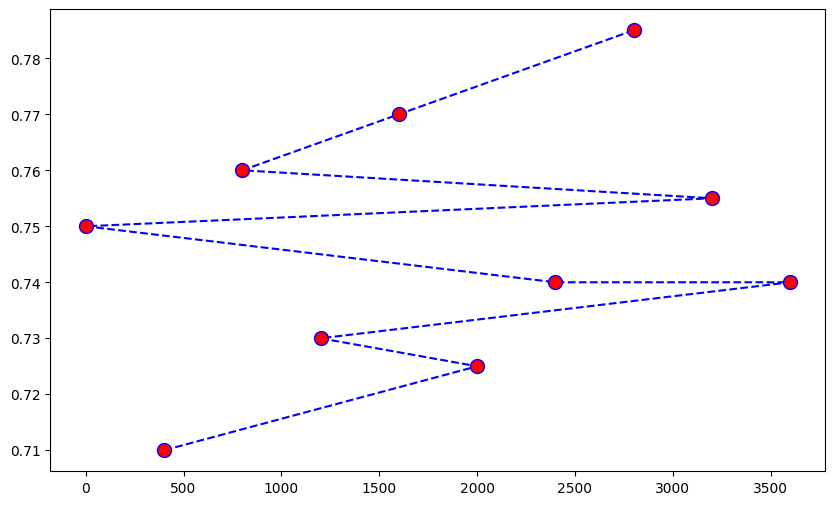

In [30]:
iterarions = []
for i in range(10):
    clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1 * 400, tol=1e-3))
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(pred, y_test)
    iterarions.append({"Accuracy": score , 'max_iter': i *400})

iteraionsdf = pandas.DataFrame(iterarions)
iteraionsdf = iteraionsdf.sort_values('Accuracy',ascending=False)
print('With an accuracy of', iteraionsdf['Accuracy'].iloc[0], 'max_iter',  iteraionsdf['max_iter'].iloc[0], 'would be the best to use')
plt.figure(figsize=(10,6))
plt.plot(iteraionsdf['max_iter'],iteraionsdf['Accuracy'],color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.show()

max_iter_to_use = iteraionsdf['max_iter'].iloc[0]

### the loss function
The loss function measures how well the model fits the training data. The SGDClassifier supports several loss functions, such as hinge loss for binary classification and log loss for multiclass classification.

<li>‘hinge’ gives a linear SVM.</li>
<li>‘log_loss’ gives logistic regression, a probabilistic classifier.</li>
<li>‘modified_huber’ is another smooth loss that brings tolerance tooutliers as well as probability estimates.</li>
<li>‘squared_hinge’ is like hinge but is quadratically penalized.</li>
<li>‘perceptron’ is the linear loss used by the perceptron algorithm.</li>
<li>The other losses, ‘squared_error’, ‘huber’, ‘epsilon_insensitive’ and ‘squared_epsilon_insensitive’ are designed for regression but can be</li> <li>useful in classification as well; see SGDRegressor for a description.</li>


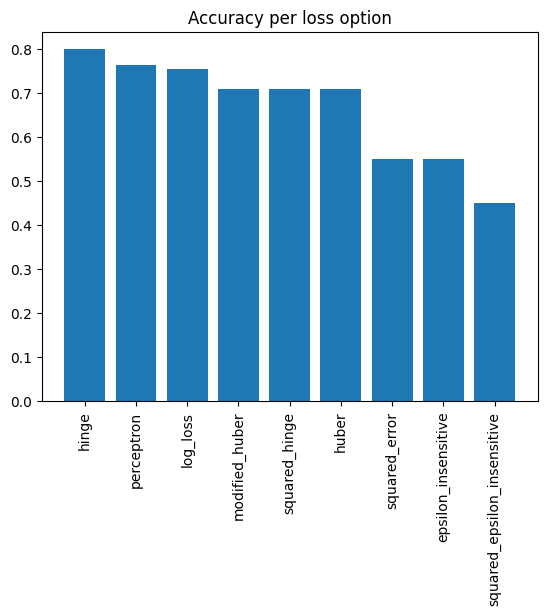

In [31]:
loss_accuracy = []
loss_options = ['hinge','log_loss','modified_huber','squared_hinge','perceptron','squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive']
for option in loss_options:
    clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=max_iter_to_use, tol=1e-3, loss=option))
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(pred, y_test)
    loss_accuracy.append({"Accuracy": score , 'loss': option})

loss_accuracydf = pandas.DataFrame(loss_accuracy)
loss_accuracydf = loss_accuracydf.sort_values(by='Accuracy', ascending = False)
plt.bar(loss_accuracydf['loss'],height=loss_accuracydf['Accuracy'])
plt.xticks(rotation=90)
plt.title('Accuracy per loss option')
plt.show()

best_loss_to_use = loss_accuracydf['loss'].iloc[0]




Running this a few times showed that the standard option hinge would be the best option to use

### Early stopping
Early stopping is a technique that stops training the model if the performance on a validation set stops improving. 

In [32]:
earlystopping = []
options = [True, False]
for option in options:
    clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter= max_iter_to_use, tol=1e-3,early_stopping= option))
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(pred, y_test)
    earlystopping.append({"Accuracy": score , 'option': option})

earlystoppingdf = pandas.DataFrame(earlystopping)
best_early_stopping_to_use = earlystoppingdf['option'].iloc[0]
earlystoppingdf.head(10)

,Accuracy,option
0,0.725,True
1,0.710,False


early stopping doesnt seem to have a big inifluence on  the accuracy of the model

In [33]:
clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter= max_iter_to_use, tol=1e-3,early_stopping= bool(best_early_stopping_to_use),loss= best_loss_to_use))
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
score = accuracy_score(pred, y_test)
print("Accuracy:", score)
algorithmScores.append({'name': 'SGD','score':score, 'sort':'classification'})

Accuracy: 0.745


## Linear svc

linear svc (support vector classification) helps to classify the data into different categories it does this by finding a straight line that separates the different categories

In [34]:
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [35]:
cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())
algorithmScores.append({'name': 'SVC','score':cv_results.mean(), 'sort':'classification'})

[0.82 0.84 0.84 0.79 0.8  0.81 0.84 0.88 0.86 0.86]
Accuracy: 0.834


In [36]:
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'SVC','report':report})

## Knearest neighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [38]:
cv_results = cross_val_score(model,X,y,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())

[0.77 0.81 0.72 0.8  0.74 0.75 0.79 0.8  0.81 0.77]
Accuracy: 0.776


In [39]:
report = classification_report(y_test, pred, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       138
           1       0.55      0.29      0.38        62

    accuracy                           0.70       200
   macro avg       0.64      0.59      0.59       200
weighted avg       0.68      0.70      0.67       200



### Finding K

to find the best K we just need to do a bit of experimenting with the value. I have made an for loop that looks at every k value between 1 and 40 that it makes a graph and shows what amount is the best.


Minimum error:- 0.24 at K = 2


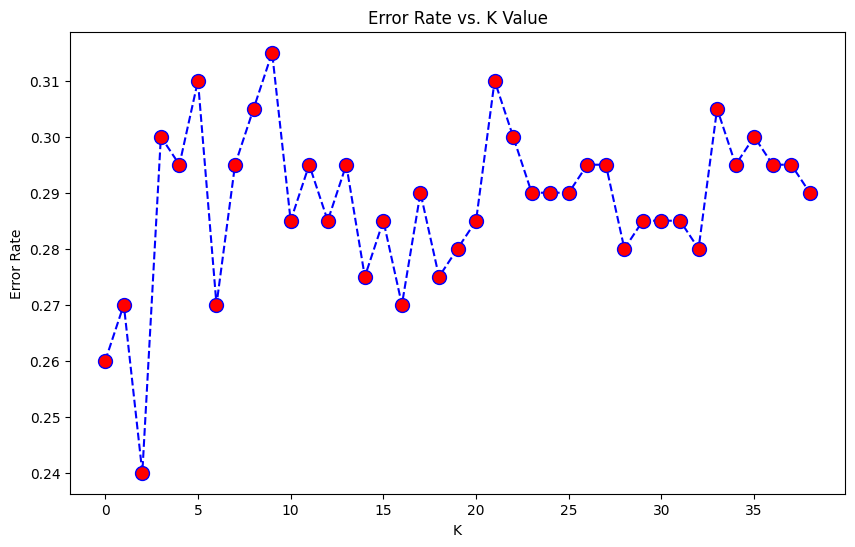

In [40]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
model.fit(X_train, y_train)
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(pred, y_test)
print("Accuracy:", score)
algorithmScores.append({'name': 'KNeighborsClassifier','score':score,'sort':'classification'})
from sklearn.metrics import classification_report
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'KNeighborsClassifier','report':report})

Accuracy: 0.73


## Random Forrest Classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [43]:
cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())   

algorithmScores.append({'name': 'RandomForestClassifier','score':cv_results.mean(), 'sort':'classification'})

[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.76 0.76 0.76]
Accuracy: 0.7529999999999999


In [44]:
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'RandomForestClassifier','report':report})

c:\Users\vickl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vickl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vickl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Logistic Regression
logistic regression is an linear classification model that uses regression

In [45]:
from sklearn.linear_model import LogisticRegression

LogisticRegressioModel = LogisticRegression(random_state=0).fit(X_train, y_train)
pred = LogisticRegressioModel.predict(X_test)

In [46]:
cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())
BaseModelLogistic = cv_results.mean()

algorithmScores.append({'name': 'LogisticRegression','score':cv_results.mean()})

[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.76 0.76 0.76]
Accuracy: 0.7529999999999999


In [47]:
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'LogisticRegression','report':report})
print(report)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       138
           1       0.67      0.42      0.51        62

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.68       200
weighted avg       0.74      0.76      0.74       200



The first results look very promising and I want to take a further look into the hyper parameters and look if there are any improvements that can be made.

### Improving the logistic regression model
There are a few hyperparameters the can help with improving the accuracy of the model. The hyperparameters I want to take a look at are:
<li>Regularization parameter (C): C is the inverse of the regularization strength, where a smaller value of C indicates stronger regularization. Regularization helps prevent overfitting and improves the generalization performance of the model.
</li>
<li>Penalty (regularization) type: The penalty hyperparameter determines the type of regularization to be applied to the logistic regression model. There are two types of penalties available in sklearn: 'l1' and 'l2'. L1 regularization is used for feature selection and results in sparse models, while L2 regularization is used for feature shrinkage.
</li>
<li>Solver: Solver is an optimization algorithm used to find the optimal solution for the logistic regression model. The available solvers in sklearn are 'newton-cg', 'lbfgs', 'liblinear', 'sag', and 'saga'. Each solver has its own advantages and disadvantages, and the choice of solver depends on the size of the dataset and the complexity of the model.
</li>
<li>Maximum number of iterations: The maximum number of iterations is the maximum number of iterations taken by the solver to converge. If the model fails to converge within the maximum number of iterations, then it may result in suboptimal performance.
</li>
<li>Class weight: Class weight is used to handle imbalanced datasets, where one class has significantly fewer samples than the other class. You can assign a higher weight to the minority class to balance the class distribution.
</li>









### Regulation

Base model: 0.7529999999999999 which uses 1.0 as default for the c parameter
The best c hyperparameter is 1.9 With an accuracy of 0.8470000000000001
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       138
           1       0.67      0.47      0.55        62

    accuracy                           0.77       200
   macro avg       0.73      0.68      0.70       200
weighted avg       0.75      0.77      0.75       200



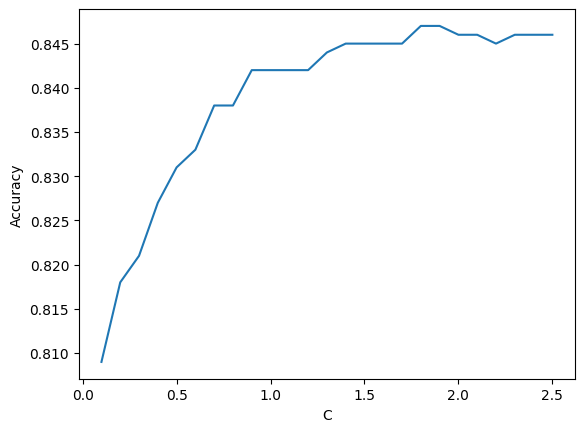

In [48]:
results = []
for i in range(25):
    clf = LogisticRegression(random_state=0,C=(i + 1)/10).fit(X_train, y_train)
    pred = clf.predict(X_test)
    cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
    report = classification_report(y_test, pred, target_names=['0','1'])
    results.append({"C": (i+1)/10,"Accuracy": cv_results.mean(),"report":report})
resultsDf = pandas.DataFrame(results)
seaborn.lineplot(x=resultsDf['C'],y=resultsDf['Accuracy'])
best = resultsDf.sort_values('Accuracy',ascending=False).iloc[0]
print("Base model:", BaseModelLogistic, "which uses 1.0 as default for the c parameter")
print('The best c hyperparameter is', best['C'], "With an accuracy of", best["Accuracy"])
print(best["report"])




The Improvement is 0,05 procent which is not a lot compared to the 83 procent of the base model. using a higher c can also lead to inaccuracy when small changes are made in the training set

### Feature importance
I am going to look which feature have to most importance to this model and if removing feature could lead to a more accurate score. 

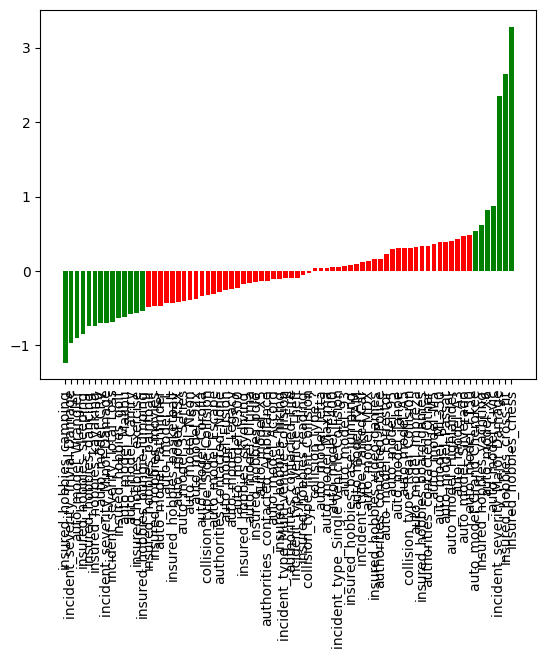

In [49]:
LogisticRegressioFeatureImportance = LogisticRegression(random_state=0).fit(X, y)
importance =  LogisticRegressioFeatureImportance.coef_
importancedf = pandas.DataFrame({"Feature":X.columns,"Importance": importance[0]})
importancedf = importancedf.sort_values('Importance',ascending=True)
colors = ['red' if x >= -0.5 and x <= 0.5 else 'green' for x in importancedf['Importance']]
plt.bar(data=importancedf, height=importancedf['Importance'],x=importancedf['Feature'],color=colors)
plt.xticks(rotation=90)
plt.show() 




Although it is not very clear which features are important but now I have an idea of how the data is distributed. To get the best features I want to remove to features that are between 0.5 and -0.5. The features closes to 0 have the least amount of impact on the outcome



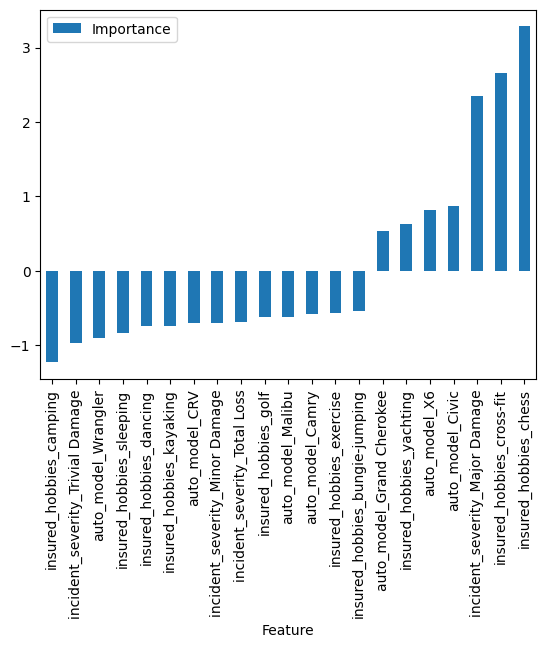

In [50]:
higher = importancedf[importancedf["Importance"] > 0.5 ]
lower = importancedf[importancedf["Importance"] < -0.5 ]
importancedf = pandas.concat([higher,lower])
importancedf = importancedf.sort_values('Importance',ascending=True)
importancedf.plot.bar(x='Feature')
plt.xticks(rotation=90)
plt.show()

Now I have a list of most useful features now I can make an new model and see if this made any improvements

In [51]:
bestFeature = importancedf["Feature"].to_numpy()
improvedX = X[bestFeature]

X_improved_train, X_improved_test, y_improved_train, y_improved_test = train_test_split(improvedX, y, test_size=0.2)


LogisticRegressioFeatureImportance = LogisticRegression(random_state=0).fit(X_improved_train, y_improved_train)
pred = LogisticRegressioFeatureImportance.predict(X_improved_test)

cv_results = cross_val_score(clf,X_improved_train,y_improved_train,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())
algorithmScores.append({'name': 'LogisticRegression feature importance','score':cv_results.mean()})

report = classification_report(y_improved_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'LogisticRegression feature importance','report':report})
print(report)

import pickle
pickle.dump(clf, open('logisticRegression.pkl','wb'))



[0.825  0.8875 0.7875 0.8375 0.7625 0.875  0.875  0.85   0.9375 0.8625]
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       150
           1       0.78      0.76      0.77        50

    accuracy                           0.89       200
   macro avg       0.85      0.84      0.85       200
weighted avg       0.88      0.89      0.88       200



This increased the percentage by 0,7 for the non-fraud and 0,4 for fraud and the average accuracy has increased by 2/3 percent which I am very happy with. we can still increase and alter the feature to get an even better overall score. They both have a very good recall which I am very happy with.

## Perceptron
Perceptron is also an linear regression model from sklearn

In [52]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
pred = clf.predict(X_test)

In [53]:
cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())

algorithmScores.append({'name': 'Perceptron','score':cv_results.mean(), 'sort':'classification'})

[0.79 0.84 0.81 0.75 0.77 0.83 0.87 0.85 0.9  0.77]
Accuracy: 0.818


In [54]:
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'Perceptron','report':report})
print(report)

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       138
           1       0.79      0.48      0.60        62

    accuracy                           0.80       200
   macro avg       0.80      0.71      0.73       200
weighted avg       0.80      0.80      0.78       200



## RidgeClassifier

In [55]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [56]:
cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())
baseModelRidge = cv_results.mean()

algorithmScores.append({'name': 'RidgeClassifier','score':cv_results.mean(), 'sort':'classification'})


[0.85 0.84 0.8  0.79 0.81 0.8  0.87 0.88 0.91 0.88]
Accuracy: 0.8430000000000002


In [57]:
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'RidgeClassifier','report':report})
baseModelRidgeReport = report
print(report)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       138
           1       0.70      0.56      0.62        62

    accuracy                           0.79       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.78      0.79      0.78       200



The precision for the people that do commit fraud is lower than with a logistic regression but it seems to have an overall higher accuracy. Improving this model could lead to a higher precision for people that commit fraud.



### improving ridgeClassifier

Improving the ridge classief can be done by changing the hyperparameters and look at which one would work the best for the model.
<li>Feature importance</li>
<li>Alpha</li>
<li>Solver</li>
<li>Class_weight</li>

### Feature importance
With feature importance I can look at the features that have the most impact and only use the most useful ones.

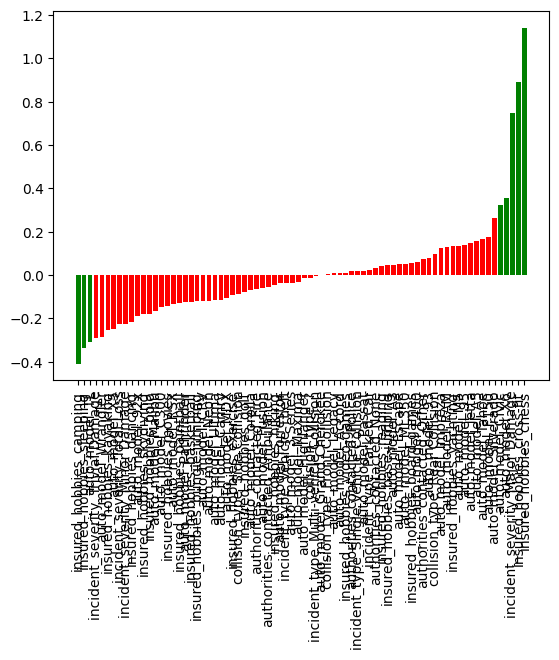

In [58]:
clf = RidgeClassifier(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
importance =  clf.coef_
importancedf = pandas.DataFrame({"Feature":X.columns,"Importance": importance[0]})
importancedf = importancedf.sort_values('Importance',ascending=True)
GroupBoundries = 0.3
colors = ['red' if x >= -GroupBoundries and x <= GroupBoundries else 'green' for x in importancedf['Importance']]
plt.bar(data=importancedf, height=importancedf['Importance'],x=importancedf['Feature'],color=colors)
plt.xticks(rotation=90)
plt.show() 

['auto_model_Civic' 'auto_model_X6' 'incident_severity_Major Damage'
 'insured_hobbies_cross-fit' 'insured_hobbies_chess'
 'insured_hobbies_camping' 'insured_hobbies_sleeping' 'auto_model_TL']


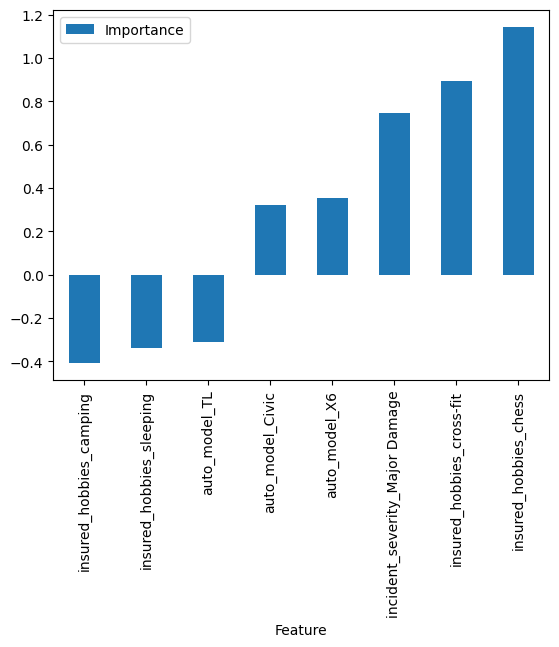

In [59]:
higher = importancedf[importancedf["Importance"] > GroupBoundries ]
lower = importancedf[importancedf["Importance"] < -GroupBoundries]
importancedf = pandas.concat([higher,lower])
print(importancedf['Feature'].unique())
importancedf = importancedf.sort_values('Importance',ascending=True)
importancedf.plot.bar(x='Feature')
plt.xticks(rotation=90)
plt.show()

In [60]:
bestFeature = importancedf["Feature"].to_numpy()
improvedX = X[bestFeature]

X_improved_train, X_improved_test, y_improved_train, y_improved_test = train_test_split(improvedX, y, test_size=0.2)


RidgeClassifierFeatureImportance = RidgeClassifier(random_state=0).fit(X_improved_train, y_improved_train)
pred = RidgeClassifierFeatureImportance.predict(X_improved_test)

cv_results = cross_val_score(clf,X_improved_train,y_improved_train,cv=30,scoring='accuracy')
algorithmScores.append({'name': 'RidgeClassifier feature importance','score':cv_results.mean()})
print(cv_results)
print('Base model ridge', baseModelRidge)
print("Accuracy:", cv_results.mean())

report = classification_report(y_improved_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'RidgeClassifier feature importance','report':report})
print(report)

[0.92592593 0.85185185 0.7037037  0.92592593 0.92592593 0.77777778
 0.85185185 0.85185185 0.92592593 1.         0.81481481 0.88888889
 0.85185185 0.88888889 0.74074074 0.81481481 0.7037037  0.88888889
 1.         0.81481481 0.92307692 0.92307692 0.92307692 0.80769231
 0.76923077 0.88461538 0.84615385 0.76923077 1.         0.84615385]
Base model ridge 0.8430000000000002
Accuracy: 0.8613485280151948
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       147
           1       0.65      0.87      0.74        53

    accuracy                           0.84       200
   macro avg       0.80      0.85      0.81       200
weighted avg       0.87      0.84      0.85       200



### alpha
Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

Ridge classifier base model with an accuracy of: 0.8430000000000002
The best c hyperparameter is 2.1 With an accuracy of 0.8470000000000001
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       147
           1       0.65      0.87      0.74        53

    accuracy                           0.84       200
   macro avg       0.80      0.85      0.81       200
weighted avg       0.87      0.84      0.85       200



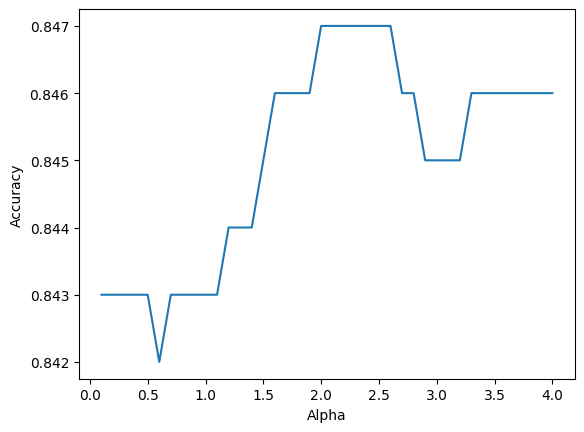

In [61]:

results = []
for i in range(40):
    clf = RidgeClassifier(tol=1e-3, random_state=0,alpha=(i + 1)/10)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
    results.append({"Alpha": (i+1)/10,"Accuracy": cv_results.mean(),"report":report})


resultsDf = pandas.DataFrame(results)
seaborn.lineplot(x=resultsDf['Alpha'],y=resultsDf['Accuracy'])
best = resultsDf.sort_values('Accuracy',ascending=False).iloc[0]
print('Ridge classifier base model with an accuracy of:', baseModelRidge)
print('The best c hyperparameter is', best['Alpha'], "With an accuracy of", best["Accuracy"])
print(best["report"])

The difference in the accuracy is not much so I am not going to change the alpha value. Altering the value can lead the inaccuracies later



### solver
Solver to use in the computational routines:
<li><strong>auto</strong> chooses the solver automatically based on the type of data.</li>
<li>sv uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than <strong>cholesky</strong> at the cost of being slower.</li>
<li><strong>cholesky</strong> uses the standard scipy.linalg.solve function to obtain a closed-form solution.</li>
<li><strong>sparse_cg</strong> uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter).</li>
<li><strong>lsqr</strong> uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.</li>
<li><strong>sag</strong> uses a Stochastic Average Gradient descent, and ‘saga’ uses its unbiased and more flexible version named SAGA. Both methods use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that <strong>sag</strong> and <strong>saga</strong> fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.</li>
<li><strong>lbfgs</strong> uses L-BFGS-B algorithm implemented in scipy.optimize.minimize. It can be used only when positive is True.</li>




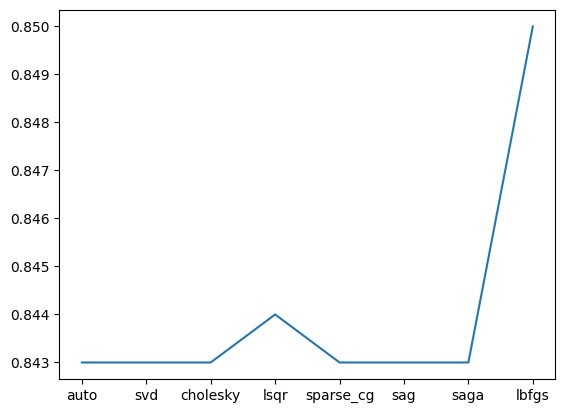

In [62]:
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
results = []

for solve in solvers:
    if solve == 'lbfgs':
        clf = RidgeClassifier(tol=1e-3, random_state=0,solver=solve, positive=True)
    else:
        clf = RidgeClassifier(tol=1e-3, random_state=0,solver=solve)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
    results.append({'Option':solve,"Accuracy": cv_results.mean()})
resultsdf = pandas.DataFrame(results)

plt.plot(resultsdf['Option'],resultsdf['Accuracy'])



It does seem that lbfgs has in influence on the accuracy but since the accuracy increases by 0,007 and does not have a big impact



### Class weight
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).



In [63]:
clf = RidgeClassifier(tol=1e-3, random_state=0, class_weight='balanced')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print('balanced:',cv_results.mean())
print('Base model',baseModelRidge)

report = classification_report(y_test, pred, target_names=['0','1'])
print(report)
print('========Base model=========')
print(baseModelRidgeReport)




balanced: 0.853
Base model 0.8430000000000002
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       138
           1       0.68      0.77      0.72        62

    accuracy                           0.81       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.82      0.81      0.82       200

========Base model=========
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       138
           1       0.70      0.56      0.62        62

    accuracy                           0.79       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.78      0.79      0.78       200



Using a balanced class weight improves the recall of the fraud reported but decreases the precision and increases the precision of the non-fraud this would be useful in the end model



## Kmeans
Kmeans is a clustering algorithm that is used for datasets with a lower amount of data samples.

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1000).fit(X_train,y_train)
pred = kmeans.predict(X_test)


In [65]:
score = accuracy_score(pred, y_test)
print("Accuracy:", score)
algorithmScores.append({'name': 'KMeans','score':score, 'sort':'Clustering'})

Accuracy: 0.56


In [66]:
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'KMeans','report':report})
print(report)

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       138
           1       0.16      0.10      0.12        62

    accuracy                           0.56       200
   macro avg       0.41      0.43      0.41       200
weighted avg       0.50      0.56      0.52       200



As expected using a clustering algorithm is not the best to use for this data set. The precision is way too low for the people that commit fraud and the overall precision of 58% is too low.



# Oversampling

In [67]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled_train, Y_resampled_train = ros.fit_resample(X_train,y_train)
print("There are in total", len(X), "resampled observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 1000 resampled observations, of which 800 are now in the train set, and 200 in the test set.


## SGD oversampled

In [68]:
clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_resampled_train,Y_resampled_train)
pred = clf.predict(X_test)

In [69]:
cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())
algorithmScores.append({'name': 'SGDClassifier oversampled','score':cv_results.mean(), 'sort':'classification'})

[0.79 0.86 0.78 0.67 0.77 0.74 0.84 0.89 0.8  0.76]
Accuracy: 0.7899999999999999


In [70]:
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'SGDClassifier oversampled','report':report})

## Svc oversmapled

In [71]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_resampled_train, Y_resampled_train)
pred = clf.predict(X_test)

In [72]:
cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())
algorithmScores.append({'name': 'SVC oversampled','score':cv_results.mean(),'sort':'classification'})

[0.82 0.84 0.84 0.79 0.8  0.81 0.84 0.88 0.86 0.86]
Accuracy: 0.834


In [73]:
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'SVC oversampled','report':report})

## Nearest neighbours oversampled

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=25)
model.fit(X_resampled_train, Y_resampled_train)
pred = model.predict(X_test)

In [75]:
cv_results = cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(cv_results)
print("Accuracy:", cv_results.mean())
algorithmScores.append({'name': 'KNeighborsClassifier oversampled','score': cv_results.mean(),'sort':'classification'})

[0.82 0.84 0.84 0.79 0.8  0.81 0.84 0.88 0.86 0.86]
Accuracy: 0.834


In [76]:
report = classification_report(y_test, pred, target_names=['0','1'])
Classification_Rapports.append({'name': 'KNeighborsClassifier oversampled','report':report})
print(report)

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       138
           1       0.57      0.74      0.65        62

    accuracy                           0.75       200
   macro avg       0.72      0.75      0.73       200
weighted avg       0.78      0.75      0.76       200



# Evaluation
In the evaluation part I am going to look at the performance of the models there are a few things I want to take a closer look at:
<li>Accuracy</li>
<li>Precision</li>
<li>Recall</li>
Looking at these points will help me understand where to improve these models and look if other models may work better.




In [77]:
for report in Classification_Rapports:
    print('======================',report['name'],'======================')
    print(report['report'])

====================== SGDClassifier ======================
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       138
           1       0.67      0.48      0.56        62

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.75      0.77      0.75       200

====================== SVC ======================
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       138
           1       0.74      0.50      0.60        62

    accuracy                           0.79       200
   macro avg       0.77      0.71      0.73       200
weighted avg       0.78      0.79      0.78       200

====================== KNeighborsClassifier ======================
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       138
           1       0.67      0.26      0.37        62

    a

Looking at the results the svc model shows a lot of promise for now. With an Average precision of 80% I am very pleased with how it is going. I was actually expexting an accuracy of around 60/70 since the data dos not have a lot of patterns to help achieve a clear path for the model. 

The precision of the people that do not commit fraud is really good but since I am predicting people that do commit fraud an precision of 60% does not satisfy me. To improve this I want to oversample the data to have an more even playing field. Looking at the oversampled results I am pleased to see it got around the same precision. But using oversmapling can lead to:
<li>The data set may not reflect the true distribution of the dataset</li>
<li>It can lead to fake view of the model since it is duplicating train data</li>

For these reasons I am not sure if I want to use oversampling in my model.

Svc and gsd and the only 2 classes without oversmapling that show an preccision and f1 score avove 50% for the data that does commit fraud. for this reason I want to improve these models. I Also want to look at some other classification models.

After adding the logistic regression model I was acctually suprised. The model showed a wat higher precision for people that commit fraud with an everage of 80% or higher. This made me look into linear models and implementing these and have added Ridgeclassifier and perceptron. These models work pretty well and the Ridgeclassifier came close to logistic regression. After implementing the feature importance Ridgeclassifier around the same as the logistic regression but after running the model a few times the logistic regression gave morre stable results.

For this reason I am going to use logistic regression with feature importance to predict fraud in this dataset.

RidgeClassifier feature importance Seems to be the best option with an everage accuracy of  86.13485280151949%


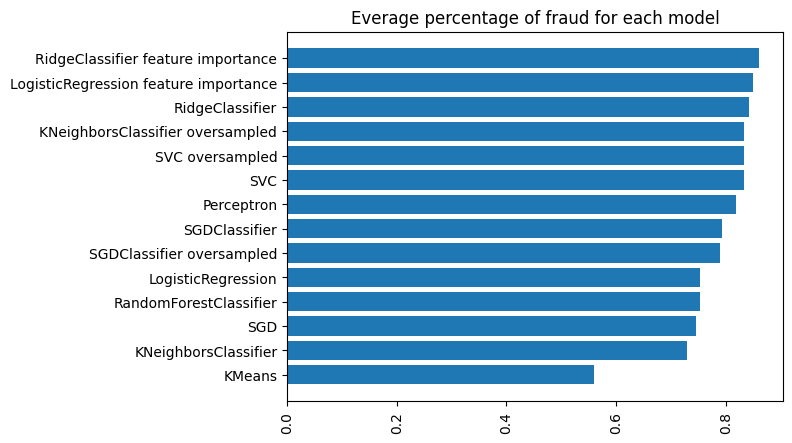

In [78]:
scoredf = pandas.DataFrame(algorithmScores)

scoredf = scoredf.sort_values(by=['score'], ascending=True)
plt.barh(scoredf['name'],scoredf['score'])
plt.xticks(rotation=90)
plt.title('Everage percentage of fraud for each model')
print(scoredf['name'].iloc[-1], 'Seems to be the best option with an everage accuracy of ', str(scoredf['score'].iloc[-1] * 100) + "%")
plt.show()

Since Oversampling is a thing I Wanted to add but is not something I want to use in the end. Using a linear model such as Logistic regression and ridge regression seems to have to most potential in predicting if someone can be detected on fraud

### Pickle
With pickling you can export the model and import it in another file to use the trained model

In [81]:
import pickle
pickle.dump(LogisticRegressioFeatureImportance, open('logisticRegression.pkl','wb'))

# Delivery
For the delivery I have made a angular application that gets the data from a python flask api that uses the pickle of the model too make the predictions

The code for the web app and the api can be found here:

https://github.com/vicklo/fraudshield.git

Make sure to read the readme.md files to install the needed packages 